# Classification Models for Titanic Dataset
In this exercise we are going to build a classification model which allows us to predict if a passenger on the titanic has survived.

As always, **import** the two standard libraries **pandas** as pd and **numpy** as np. Afterwards, **load** the training and test datasets of the titanic data which we have prepared and saved as pickle files during the last exercise. Call the dataframes **train** and **test**. Use the info method on both dataframes.

**Hint:** Use the pandas method **read_pickle()** to read the two files **'titanic_train.pkl'** and **'titanic_test.pkl'**.

In [ ]:
# Import pandas and numpy
import pandas as pd
import numpy as np

In [ ]:
# Read pickle files
train = pd.read_pickle('titanic_train.pkl')
test = pd.read_pickle('titanic_test.pkl')

In [ ]:
# Info
train.info()
#test.info()

Next, we need to **separate** the **features** and the classification **target**. Hence, **create** the variables **X_train**, **y_train**, **X_test** and **y_test** from the two dataframes **train** and **test**, where for instance X_train contains all the features and y_train contains only the target **'Survived'** of the dataframe train (analogue for the test data).

In [ ]:
# Separate features and target
X_train, X_test = train.drop(['Survived'], axis=1), test.drop(['Survived'], axis=1)
y_train, y_test = train['Survived'], test['Survived']

## Decision Tree for Classification

The first model we want to train is a single decision tree for classification. Therefore, **import** the class **DecisionTreeClassifier** from the module **sklearn.tree**. Afterwards, **create an object** of that class called **tree_clf**. Pass the argument **random_state=42** to the constructor.

In [ ]:
# Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create instance
tree_clf = DecisionTreeClassifier(random_state=42)

Now we can fit the model by using the **fit(X,y)** method of the object.

In [ ]:
# Fit the model
tree_clf.fit(X_train, y_train)

### Accuracy
Next, we want to compute the accuracy of our predictions, which is given by the number of correct predictions, divided by all predictions:  

$$\mathrm{Acc}= \frac{\# correct\ predictions}{\# all\ samples}$$

Therefore, **create** a results dataframe called **results**, which has one column **containing y_test** and another column **containing our predictions** on the test data. To create the predictions you can use the **predict(X)** method of the model on the dataframe **X_test**. Call the resulting numpy array **y_pred**. Afterwards, you can create a dataframe by using the dictionary approach. Call the column holding the true values **y_true**.

In [ ]:
# Create predictions
y_pred = tree_clf.predict(X_test)

In [ ]:
# Create result dataframe
results = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
results.head()

Next, **compute the accuarcy** using the results dataframe.

In [11]:
# Compute accuracy by hand
acc = len(results[results.y_pred == results.y_true]) / len(results)
acc

0.7821229050279329

Actually, we do not have to compute the accuracy manually, but it is a good practice to compute a performance measure once *by hand*. Please, **crosscheck your result** by using the **accuracy_score** function from the modul **sklearn.metrics**.

In [14]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

In [15]:
# Compute accuracy
accuracy_score(y_test, y_pred)

0.7821229050279329

There is also another option to compute the accuracy. Most of the sklearn models have a method called score(). In the case of classification this score is by default the accuracy. In regression models it is the r2_score. Please use that method to compute the accuracy.

In [16]:
# Use model score method
tree_clf.score(X_test, y_test)

0.7821229050279329

For an **imbalanced dataset**, i.e. the classes are not equally distributed in the dataset, the **accuracy is not a good performance measure**. Can you **explain** why?

### Confusion matrix

Next, we look at another way to evaluate the performance of our classification model: the **confusion matrix**. It is a specific table layout which **holds** the number of True Positives (**TP**), True Negatives (**TN**), False Positives (**FP**) and False Negatives (**FN**).

Please, **compute TP, TN, FP and FN** with the dataframe results. Afterwards, we create the confusion matrix.

In [17]:
# Compute TP, TN, FP and FN
TP = len(results[(results.y_pred == 1) & (results.y_true == 1)])
TN = len(results[(results.y_pred == 0) & (results.y_true == 0)])
FP = len(results[(results.y_pred == 1) & (results.y_true == 0)])
FN = len(results[(results.y_pred == 0) & (results.y_true == 1)])

# Create confusion matrix
C = pd.DataFrame(np.array([[TN, FP], [FN, TP]]))
C.index.name = 'true'
C.columns.name = 'predicted'
C

predicted,0,1
true,,
0,83,22
1,17,57


Again, there is a function which computes that matrix automatically, given y_test and y_pred. Please, **import** the function **confustion_matrix** from the module **sklearn.metrics** and **crosscheck** your results.

In [18]:
# Import conf function
from sklearn.metrics import confusion_matrix

In [19]:
# Compute confusion matrix
C = confusion_matrix(y_test, y_pred)
C

array([[83, 22],
       [17, 57]])

### Precision and Recall
Next, we want to compute the Precision, given by
$$\mathrm{Precision} = \frac{TP}{TP + FP} = \frac{TP}{P^*}$$
and the Recall, defined as
$$\mathrm{Recall} = \frac{TP}{TP + FN} = \frac{TP}{P},$$  

where $P^*$ and $P$ are the numbers of predicted positive instances and of all positive instances, respectively.

The Precison describes how precise a positive prediction of the model is. For instance, if the precision is 0.9 it means that 90% of the positive predictions really belong to the positive class.  
Recall (also known as hit rate) describes the proportion of the positive class which has been detected by the model. For Instance, a recall of 0.6 means that 60 % of the all positive instances have been detected by the model as such.

In [20]:
# Compute Precision
precision = TP / (TP + FP)
precision

0.7215189873417721

In [21]:
# Compute Recall
recall = TP / (TP + FN)
recall

0.7702702702702703

Of course, there are again prebuilt functions to compute these measures. Please **crosscheck** your results by using the functions **precision_score** and **recall_score** from the module **sklearn.metrics**.

In [22]:
# Import functions
from sklearn.metrics import precision_score, recall_score

In [23]:
# precision
precision_score(y_test, y_pred)

0.7215189873417721

In [24]:
# recall
recall_score(y_test, y_pred)

0.7702702702702703

### Classification Report

Most of the performance measures that we have computed so far are contained in the **classification report**. It can be computed by using the method **classification_report** from the module **sklearn.metrics**. Please, use that function and have a look at the report.

In [25]:
# Import function
from sklearn.metrics import classification_report

In [26]:
# Compute report
report = classification_report(y_test, y_pred)

print(report)

             precision    recall  f1-score   support

          0       0.83      0.79      0.81       105
          1       0.72      0.77      0.75        74

avg / total       0.79      0.78      0.78       179



### Visualization of the Classification Tree
Next, we want to visualize two classification trees, similarly to the regression tree in the regression exercise. However, this time we visualize the fully grown tree as well as a pruned tree.

Please, **create** a tree object called **tree_2_clf** with **max_depth=2** and **random_state=42** and **train it**. Afterwards, **compute the classification report**.

In [28]:
# Create tree with fixed depth of 2
tree_2_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In [29]:
# Train tree
tree_2_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [30]:
# Classification report
y_pred = tree_2_clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.95      0.83       105
          1       0.88      0.50      0.64        74

avg / total       0.79      0.77      0.75       179



Hey, the pruned tree seems to be better. Can you explain why?   

To visualize both trees we need to **import** the function **export_graphviz** from the module **sklearn.tree**.

In [31]:
# Import
from sklearn.tree import export_graphviz

In [32]:
# Just execute
export_graphviz(tree_clf, out_file="tree_clf.dot",
                feature_names=X_train.columns.tolist(),
                filled=True, rounded=True)

# Just execute
export_graphviz(tree_2_clf, out_file="tree_2_clf.dot",
                feature_names=X_train.columns.tolist(),
                filled=True, rounded=True)

Please, open a terminal and execute the command **sudo apt install graphviz** if you haven't installed that package in the previous exercise. If the package has been installed, you can execute the command in the cell below. Afterwards, you should find the two trees in your execerise folder.

In [33]:
%%bash
dot -Tpng tree_clf.dot -o tree_clf.png
dot -Tpng tree_2_clf.dot -o tree_2_clf.png

Look at the two trees and try to explain them.   

**Bonus**:

Try to recompute the first two levels of the small tree. The Gini Coefficient is defined as 

$$ G = \sum_k \hat{p}_{mk} (1 - \hat{p}_{mk})$$

where 

$$\hat{p}_{mk} = \frac{1}{N_m} \sum_{x_i \in R_m} I(y_i = k)$$

is the proportion of training observations in the m-th region from the k-th class. For a binary classifier this can be simplified to 

$$G = \hat{p}_{m} (1-\hat{p}_m) + \hat{q}_m (1-\hat{q}_m) = 2 \hat{p}_m (1-\hat{p}_m)$$ and 

$$\hat{p}_{m} = \frac{1}{N_m} \sum_{x_i \in R_m} I(y_i = 1).$$

Additionally, compute the values of $p_m$ for the leafs by using the values given in the figure.

In [34]:
# level 0
samples = len(y_train)
print(y_train.value_counts())
p_level0 = len(y_train[y_train == 1]) / samples
print(p_level0)
gini = 2 * p_level0 * (1-p_level0)
print(gini)

0    444
1    268
Name: Survived, dtype: int64
0.37640449438202245
0.469448301982073


In [35]:
# level 1 left
df = X_train.join(y_train)
df_level1_left = df[df['Sex=male'] == 0]

y_level1_left = df_level1_left['Survived']

samples = len(y_level1_left)

p_level1 = len(y_level1_left[y_level1_left == 1]) / samples

print(p_level1)
gini = 2 * p_level1 * (1-p_level1)
print(gini)
print(y_level1_left.value_counts())

0.7387755102040816
0.38597251145356104
1    181
0     64
Name: Survived, dtype: int64


In [36]:
# level 1 right
df = X_train.join(y_train)
df_level1_right = df[df['Sex=male'] == 1]
y_level1_right = df_level1_right['Survived']
samples = len(y_level1_right)
p_level1 = len(y_level1_right[y_level1_right == 1]) / samples
print(p_level1)
gini = 2 * p_level1 * (1-p_level1)
print(gini)
print(y_level1_left.value_counts())

0.18629550321199143
0.30317897738996463
1    181
0     64
Name: Survived, dtype: int64


In [37]:
# Computation of the probabilities
p0 = 125/130
p1 = 56/(59+56)
p2 = 15/(7+15)
p3 = 72/445
print('p0 = {},\np1 = {},\np2 = {},\np3 = {}'.format(p0,p1,p2,p3))

p0 = 0.9615384615384616,
p1 = 0.48695652173913045,
p2 = 0.6818181818181818,
p3 = 0.16179775280898875


### Probability/Certainty and Precision-Recall Trade-Off

The values for p that we have computed in the bonus exercise can be considered as the probability/certainty of a sample in that region/hyperrectangle belonging to class 1. However, this only makes sense for pruned trees. **Try to explain why!**

We can get these probabilities by using the method **predict_proba(X)** of the decision tree **tree_2_clf**. Please, compute these probabilities on the test set. Afterwards, **create** a **dataframe** called **results_proba** which consists of a column with the true values **y_test** called **y_true** and another column with the predicted **probabilites for class 1** called **y_proba**.

In [38]:
# Compute probabilities
y_proba = tree_2_clf.predict_proba(X_test)
print(y_proba.shape)
y_proba[:10]

(179, 2)


array([[0.83820225, 0.16179775],
       [0.83820225, 0.16179775],
       [0.83820225, 0.16179775],
       [0.03846154, 0.96153846],
       [0.51304348, 0.48695652],
       [0.03846154, 0.96153846],
       [0.51304348, 0.48695652],
       [0.83820225, 0.16179775],
       [0.51304348, 0.48695652],
       [0.03846154, 0.96153846]])

In [39]:
# Extract proba for class 1
y_proba_class1 = y_proba[:,1]
y_proba_class1[:5]

array([0.16179775, 0.16179775, 0.16179775, 0.96153846, 0.48695652])

In [40]:
# Create dataframe
results_proba = pd.DataFrame({'y_true': y_test, 'y_proba': y_proba_class1})
results_proba.head()

,y_proba,y_true
709,0.161798,1
439,0.161798,0
840,0.161798,0
720,0.961538,1
39,0.486957,1


#### Prediction Threshold
Now, let us introduce the **threshold**. Per default a binary classifier, which can compute probabilities, classifies a sample belonging to class 1 if the probability is **larger than 0.5**. This value is called the threshold. Of course, we can also use different thresholds. 

**Bonus:**

**Compute the classification report for three different thresholds**:

a) 0.20  
b) 0.50  
c) 0.70   

**Hint:** Add four new columns called **y_pred_A**, y_pred_B, etc. to the dataframe results_proba. Fill them with the value 1 if the probability is larger than the threshold. You can use the numpy method **np.where()**.

Do you see any difference in the classification reports?

In [41]:
# Compute predictions for different thresholds
results_proba['y_pred_A'] = np.where(results_proba.y_proba > 0.2, 1, 0)
results_proba['y_pred_B'] = np.where(results_proba.y_proba > 0.5, 1, 0)
results_proba['y_pred_C'] = np.where(results_proba.y_proba > 0.7, 1, 0)
results_proba.head()

,y_proba,y_true,y_pred_A,y_pred_B,y_pred_C
709,0.161798,1,0,0,0
439,0.161798,0,0,0,0
840,0.161798,0,0,0,0
720,0.961538,1,1,1,1
39,0.486957,1,1,0,0


In [42]:
# Compute classification reports
report_A = classification_report(y_test, results_proba['y_pred_A'])
report_B = classification_report(y_test, results_proba['y_pred_B'])
report_C = classification_report(y_test, results_proba['y_pred_C'])
print(report_A)
print(report_B)
print(report_C)

             precision    recall  f1-score   support

          0       0.81      0.83      0.82       105
          1       0.75      0.72      0.73        74

avg / total       0.78      0.78      0.78       179

             precision    recall  f1-score   support

          0       0.73      0.95      0.83       105
          1       0.88      0.50      0.64        74

avg / total       0.79      0.77      0.75       179

             precision    recall  f1-score   support

          0       0.73      0.96      0.83       105
          1       0.90      0.49      0.63        74

avg / total       0.80      0.77      0.75       179



Maybe you have noticed that the precision for class 1 increases, while increasing the threshold. However, for the recall we observe the opposite effect. This is called the Precision-Recall Trade-Off.

## Random Forest Classifier

In this part of the exercise we want to train a random forest classifier. Therefore, please **import** the class **RandomForestClassifier** from the module **sklearn.ensemble**, **create** an **object** of that class called **rf_clf** and **train the model** with the training data **X_train, y_train**. Afterwards, compute the classification report. Please, pass the argument **random_state=42** and **n_estimators=100** to the constructor.

In [43]:
# Import rf
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Create object
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

In [45]:
# Train rf
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [46]:
# Compute predictions y_pred
y_pred = rf_clf.predict(X_test) 

In [47]:
# Compute classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.85      0.84       105
          1       0.78      0.76      0.77        74

avg / total       0.81      0.81      0.81       179



As expected, the result is much better than for a single tree.   

We can also use the random forest to get probabilities with the predict_proba method. However, this time it is computed in a different way compared to a single decision tree. Here, it is the proportion of trees which voted for class 1.

Please, **create** a dataframe called **results_rf** which contains **y_test** and the **probabilities for class 1**. Call the two columns **'y_true'** and **'y_proba'**, respectively. 

In [48]:
# Compute probas
y_proba = rf_clf.predict_proba(X_test)

In [ ]:
%who

In [49]:
# Create dataframe
results_rf = pd.DataFrame({'y_true': y_test, 'y_proba':y_proba[:,1]})
results_rf.head()

,y_proba,y_true
709,0.44,1
439,0.02,0
840,0.10,0
720,0.96,1
39,0.35,1


In [50]:
# Number of unique probas
pd.Series(y_proba[:,1]).nunique()

81

**Bonus:**  

**Create a boxplot** which shows the **probability distribution y_proba** for the true values of class 0 and class 1.
First, **import seasborn as sns** and issue the command **%matplotlib inline**. Afterwards, use the boxplot method where **x='y_true'** and **y='y_proba'**. For a good classifier both distributions have only a small overlap with each other and the medians should be well separated.

In [51]:
# Import seaborn
import seaborn as sns
%matplotlib inline

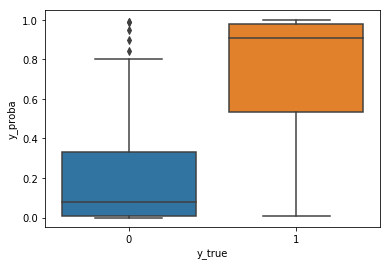

In [52]:
# boxplot
sns.boxplot(data=results_rf, x='y_true', y='y_proba')
#sns.violinplot(data=results_rf, x='y_true', y='y_proba')

### Precision/Recall curves
Next, we want to investigate the precision-recall trade-off of our model.
Sklearn provides a method which computes precisions and recalls for various threshold values. Therefore, import the function **precision_recall_curve** from the module **sklearn.metrics**.

In [53]:
# Import precison_recall_curve
from sklearn.metrics import precision_recall_curve

If you look at the docstring of the function you notice that this function returns three arrays. We can directly *unpack* the return values into three arrays called precision, recall and threshold. Please, use that function to compute the three numpy arrays.

In [54]:
# Compute precision, recall and threshold
precision, recall, threshold = precision_recall_curve(y_test, y_proba[:,1])

Now we can plot two curves:

1. precision (recall) vs. threshold
2. precision vs. recall

Therefore, please execute the cell below which defines two plotting functions.

In [55]:
# Just execute

from matplotlib import pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds,
                                      color="g", labels=('Precision', 'Recall')):
    '''Function takes precisions, recalls and
    thresholds as arguments and generates a plot with two curves.
        Optionally you can define the color and the labels.'''
    fig = plt.figure()
    plt.plot(thresholds, precisions[:-1], color + "--", label = labels[0])
    plt.plot(thresholds, recalls[:-1], color + "-", label = labels[1])
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    return fig

def plot_precision_vs_recall(precisions, recalls, color="g", label='model'):
    fig = plt.figure()
    plt.plot(recalls, precisions, color + "--", label = label)
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="upper right")
    return fig

Use the two functions to create the two plots.

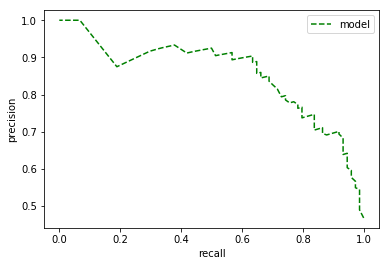

In [57]:
# precision vs recall
fig = plot_precision_vs_recall(precision, recall)
#fig.savefig("/home/jodahr/Desktop/Blogbeitrag-Metriken/precRecall.pdf")

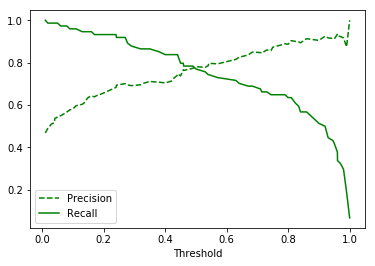

In [58]:
# precision (recall) vs. threshold
fig = plot_precision_recall_vs_threshold(precision, recall, threshold)
#fig.savefig("/home/jodahr/Desktop/Blogbeitrag-Metriken/precRecallVsThreshold.pdf")

The intersection point of the precision and recall curve is called the **breakeven point**.

**Question:** What threshold do we need if we want to have a precision of 0.9? What will be the recall value? (read it off the diagram).

In [ ]:
# solution: threshold: 0.9, recall 0.5

In [59]:
def plot_roc_curve(fpr, tpr, auc, color="g", label='model'):
    fig = plt.figure()
    #plt.title('ROC Curve')
    plt.plot(fpr, tpr, color + "--", label = label + ", AUC = {:0.2f}".format(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.ylim([-0.02,1.02])
    plt.plot([0,1],[0,1], label='Zufall')
    return fig

In [60]:
import sklearn
fpr, tpr, thresholds= sklearn.metrics.roc_curve(y_test,y_proba[:,1])
auc = sklearn.metrics.auc(fpr, tpr)

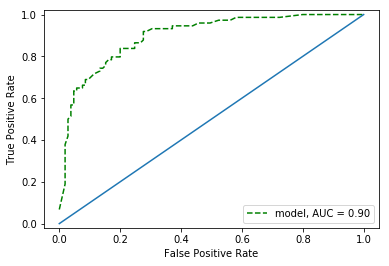

In [61]:
fig = plot_roc_curve(fpr,tpr,auc)
#fig.savefig("/home/jodahr/Desktop/Blogbeitrag-Metriken/roc.pdf")

### Feature Importance
In this part we compute the feature importance of the random forest. For a classification problem the features are ranked according to their proportion of the reduction of the gini coefficient. The computation will be very similar to the feature importance part of the regression exercise. Please perform the following steps:

1. Create a **list** of features called **features** by using the **columns attribute** of X_train and the **tolist()** method.
2. Create a **list** of the **feature importance** values by accessing the attribute **feature\_importances\_** of the random forest. 
3. Create a **dataframe importance_df** which contains the two lists as columns.
4. Sort the dataframe by the feature importance column in descending order.

In [62]:
# Create two lists
featues = X_train.columns.tolist()
importances = rf_clf.feature_importances_

In [63]:
# Create dataframe importance_df
importance_df = pd.DataFrame({'features': featues,
                              'importances': importances})\
    .sort_values(by='importances', ascending=False)
importance_df

,features,importances
1,Age,0.228174
2,Fare,0.218795
4,Sex=male,0.179468
3,Familiy_Size,0.075691
0,Pclass,0.070605
9,marital_status=yes,0.062598
8,marital_status=no,0.044256
17,Deck=unknown,0.033431
6,Embarked=S,0.021225
7,Title=rareTitle,0.017027


Surprisingly, the feature Pclass does not seem to be that important as we migh have thought. Maybe we have been biased by the movie titanic too much? But wait, what about the feature Fare? It is a numeric feature which describes the price of the ticket. This feature is probably correlated with Pclass.

**Bonus**

To check if Fare depends on Pclass please create a boxplot which show the distribution of Fare for the different classes. As the data you can use the training dataset. Furthermore, Look at the distribution of Fare for the two different target labels. Use the training dataset.

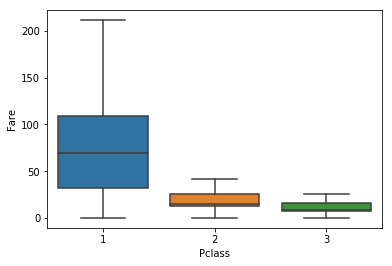

In [64]:
# Distribution of Fare with respect to Pclasses
sns.boxplot(data=X_train, x='Pclass', y='Fare', showfliers=False)

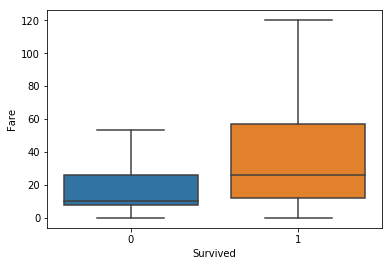

In [65]:
# Distribution of Fare with respect to the target label
df = X_train.join(y_train)
sns.boxplot(data=df, x='Survived', y='Fare', showfliers=False)

**Bonus**: Sum all feature importance values which belong to one categorical variable.

**Hint**:

1. Use the apply method and the split function on the column importance_df['features']
2. Use groupby, sum, and sort

In [66]:
# Create new column
importance_df['features_split'] = importance_df['features']\
    .apply(lambda x: x.split('=')[0])

In [67]:
# Compute sum
importance_df.groupby('features_split')\
    .sum().sort_values('importances', ascending=False)

,importances
features_split,
Age,0.228174
Fare,0.218795
Sex,0.179468
marital_status,0.106854
Familiy_Size,0.075691
Deck,0.072759
Pclass,0.070605
Embarked,0.030627
Title,0.017027


## K nearest Neighbors Classification

Enough about decison trees. In this part we want to train k nearest neighbors classification model. Since this model uses a distance metric for training, we need to standardize the data. This can be done by using the class **StandardScaler** from the module **sklearn.preprocessing**. Please import that class and create an object called **scaler**. Use the **fit_transform** method of that object on **X_train** and the **transform** method on **X_test**. Call the resulting numpy arrays **X_trained_scaled_array** and **X_test_scaled_array**, respectively.

In [68]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [69]:
# Create object scaler
scaler = StandardScaler()

In [70]:
# Perform fit_transform on X_train and transform on X_test
X_train_scaled_array = scaler.fit_transform(X_train)
X_test_scaled_array = scaler.transform(X_test)

The scaled output are numpy array. Please **extract the column names and the indices** of the train and test data. Afterwards, **create two dataframes** called **X_train_scaled** and **X_test_scaled** holding the scaled training data and scaled test data, respectively.

In [71]:
# Extract columns and indices
columns = X_train.columns.tolist()
train_index = X_train.index.tolist()
test_index = X_test.index.tolist()

In [72]:
# Create scaled dataframes
X_train_scaled = pd.DataFrame(X_train_scaled_array,
                              columns=columns, index=train_index)

X_test_scaled = pd.DataFrame(X_test_scaled_array,
                              columns=columns, index=test_index)

Use the describe method on both dataframes and check whether the scaling was successful.

In [75]:
# Check scaling
X_train_scaled.describe()
X_test_scaled.describe()

,Pclass,Age,Fare,Familiy_Size,Sex=male,Embarked=Q,Embarked=S,Title=rareTitle,marital_status=no,marital_status=yes,Deck=B,Deck=C,Deck=D,Deck=E,Deck=F,Deck=G,Deck=T,Deck=unknown
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,1.790000e+02,179.000000
mean,-0.129359,0.080039,-0.036620,-0.082843,-0.087089,0.038527,-0.164872,0.003864,0.031755,0.079579,-0.013754,-0.130394,0.319721,0.052049,-0.079970,0.021198,-3.750293e-02,-0.067429
std,1.064922,1.010578,0.759588,0.773875,1.027361,1.058342,1.075702,1.009214,1.025310,1.081838,0.974917,0.747107,1.670729,1.125740,0.606036,1.153904,6.958358e-17,1.044578
min,-1.614136,-2.141774,-0.627467,-0.554666,-1.380624,-0.303355,-1.675556,-0.277769,-0.507888,-0.394771,-0.237444,-0.280692,-0.165581,-0.190762,-0.125267,-0.065049,-3.750293e-02,-1.864936
25%,-1.614136,-0.532641,-0.475429,-0.554666,-1.380624,-0.303355,-1.675556,-0.277769,-0.507888,-0.394771,-0.237444,-0.280692,-0.165581,-0.190762,-0.125267,-0.065049,-3.750293e-02,-0.664362
50%,0.813034,-0.152590,-0.348262,-0.554666,0.724310,-0.303355,0.596817,-0.277769,-0.507888,-0.394771,-0.237444,-0.280692,-0.165581,-0.190762,-0.125267,-0.065049,-3.750293e-02,0.536211
75%,0.813034,0.607511,-0.003387,0.040096,0.724310,-0.303355,0.596817,-0.277769,-0.507888,-0.394771,-0.237444,-0.280692,-0.165581,-0.190762,-0.125267,-0.065049,-3.750293e-02,0.536211
max,0.813034,3.191853,4.424713,3.013909,0.724310,3.296463,0.596817,3.600109,1.968937,2.533114,4.211513,3.562627,6.039345,5.242137,7.982936,15.373137,-3.750293e-02,0.536211


Now we can train our K nearest neighbor classifier. **Import** the class **KNeighborsClassifier** from the module **sklearn.neighbors**. Instanciate an **object** called **knn_clf**. Do not pass any parameters to the constructor. However, you can **check the default values**.

In [76]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [78]:
# Create object knn_clf
knn_clf = KNeighborsClassifier()

Finally, train the model on the scaled data, compute the predictions y_pred and the probabilities y_proba for class 1. Call the new created predictions y_pred_knn_scaled and y_pred_probas_class1_knn_scaled. Afterwards, compute the classification report.

In [79]:
# Fit, predict, predict_probas and create classification report
knn_clf.fit(X_train_scaled, y_train)
y_pred_knn_scaled = knn_clf.predict(X_test_scaled)
y_probas_knn_scaled = knn_clf.predict_proba(X_test_scaled)
y_probas_class1_knn_scaled = y_proba[:,1]
print(classification_report(y_test, y_pred_knn_scaled))

             precision    recall  f1-score   support

          0       0.80      0.82      0.81       105
          1       0.74      0.72      0.73        74

avg / total       0.78      0.78      0.78       179



To check whether the scaling was really necessary, please perform the steps above also for the unscaled data X_train and X_test.

In [80]:
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
y_probas_knn = knn_clf.predict_proba(X_test)
y_probas_class1_knn = y_proba[:,1]
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.85      0.79       105
          1       0.73      0.58      0.65        74

avg / total       0.74      0.74      0.73       179



Hey, scaling was worth it! In the theory part we have already learned why it was necessary.

During the Feature Engineering part we learned another important part about the usage of ordinal categorical variables. The variable Pclass could be problematic. Do you have an idea why?   


We need to *one hot encode* the categorical variable Pclass to use it with a model which uses distance metrics. Please execute the code below which performs the dummy encoding on that column and rejoins it to the training and test data.

In [81]:
# Just execute
from sklearn.preprocessing import OneHotEncoder

In [82]:
# Just execute
Pclass_train = pd.get_dummies(X_train['Pclass'],
               prefix_sep='=',
               drop_first=True,
               prefix='Pclass')

Pclass_test = pd.get_dummies(X_test['Pclass'],
               prefix_sep='=',
               drop_first=True,
               prefix='Pclass')

In [83]:
# Just execute
X_train_new = X_train.join(Pclass_train).drop(['Pclass'], axis=1)
X_test_new = X_test.join(Pclass_test).drop(['Pclass'], axis=1)

In [84]:
# Just execute
columns = X_train_new.columns.tolist()
train_index = X_train_new.index.tolist()
test_index = X_test_new.index.tolist()

In [85]:
# Just execute
X_train_scaled_array = scaler.fit_transform(X_train_new)
X_test_scaled_array = scaler.transform(X_test_new)

In [86]:
# Just execute
X_train_scaled = pd.DataFrame(X_train_scaled_array,
                              columns=columns, index=train_index)

X_test_scaled = pd.DataFrame(X_test_scaled_array,
                              columns=columns, index=test_index)

In [87]:
# Just execute
knn_clf.fit(X_train_scaled, y_train)
y_pred = knn_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.82      0.82       105
          1       0.74      0.73      0.73        74

avg / total       0.78      0.78      0.78       179



The result is now slightly better. Actually, we should not always modify the model and investigate if the performance on the test data set has been improved. In this way we somehow try to **fit the test data** (overfitting).

### Cross Validation

We can compute a **better estimate for the accuracy of our model on unseen data** by using K-Fold cross validation. Therefore, the **data is split into K folds**. The model is trained K times on K-1 splits of the training data and evaluated on the hold out set (which changes for each fit). Afterwards, we take the mean of all K performances.   

Let's **compute an example** of 10-Fold cross validation **for our models** knn_clf, rf_clf, tree_clf and tree_2_clf. First, **import** the function **cross_val_score** from the module **sklearn.model_selection**. Afterwards, **use** the function **cross_val_score** and pass as the **arguments** the **estimator/model**, the **scaled training data X_train_scaled**, our **target y_train**, the number of folds (**cv=10**) and the scoring (**'accuracy'**). The results will be numpy arrays containing 10 scores. Please name the numpy arrays **scores_knn**, **scores_rf**, **scores_tree** and **scores_fixed_tree** for the different models.

In [90]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

In [91]:
# Compute 10 Fold Cross validation scores
scores_knn = cross_val_score(estimator=knn_clf, X=X_train_scaled, y=y_train, cv=10, scoring='accuracy')
scores_rf = cross_val_score(estimator=rf_clf, X=X_train_scaled, y=y_train, cv=10, scoring='accuracy')
scores_tree = cross_val_score(estimator=tree_clf, X=X_train_scaled, y=y_train, cv=10, scoring='accuracy')
scores_fixed_tree = cross_val_score(estimator=tree_2_clf, X=X_train_scaled, y=y_train, cv=10, scoring='accuracy')

If you have computed the four numpy arrays you can just execute the cell below to compute the mean and the standard deviation of the scores.

In [92]:
# Just execute
# Print performance results
print("knn: \t score = {} +- {}".format(np.mean(scores_knn),
                                        np.std(scores_knn)))
print("tree: \t score = {} +- {}".format(np.mean(scores_tree),
                                         np.std(scores_tree)))
print("tree2: \t score = {} +- {}".format(np.mean(scores_fixed_tree),
                                          np.std(scores_fixed_tree)))
print("rf: \t score = {} +- {}".format(np.mean(scores_rf),
                                       np.std(scores_rf)))

knn: 	 score = 0.8148373574782024 +- 0.0585197303654758
tree: 	 score = 0.7671797451374915 +- 0.049001712711749947
tree2: 	 score = 0.7697233400402415 +- 0.070962890657645
rf: 	 score = 0.817455287279231 +- 0.04371949230147187


Hey, it looks like the random forest performs best, closely followed by our k nearest neighbor model.

### Principal Component Analysis and Dimensional Reduction

In the final part of the exercise we want to reduce the number of dimensions by using a PCA. Afterwards, we fit our k nearest neighbor model (knn) to the data of the first two principal components. Since only two dimensions are left, we can produce a scatter plot to visualize our results. Please follow the follwowing steps:

1. import the class PCA from the module sklearn.decomposition
2. create an object of the PCA class called pca
3. fit the object by using its fit method on the training dataset X_train_scaled
4. use the transform method of the fitted pca object on X_train_scaled and X_train_test
5. call the resulting numpy arrays of step 4 X_train_pca and X_test_pca

In [93]:
# Import PCA
from sklearn.decomposition import PCA

In [94]:
# Create object pca
pca = PCA()

In [95]:
# Fit pca
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [96]:
# Transform data
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

We can also look at the explained variance of the principal components. Please execute the two cells below to create a scree plot and a cumulative variance plot.

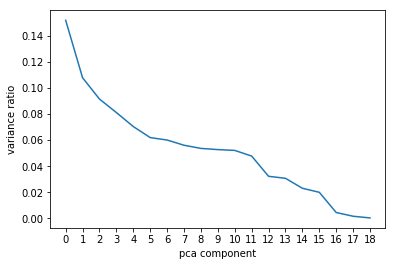

In [97]:
# Create scree plot
exp_variance = pca.explained_variance_ratio_
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, 19))
ax.set_xlabel('pca component')
ax.set_ylabel('variance ratio')
ax.plot(exp_variance)

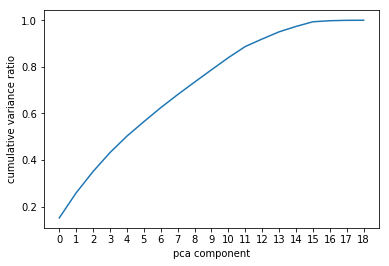

In [98]:
# Create cumulative variance plot
exp_variance = pca.explained_variance_ratio_
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, 19))
ax.set_xlabel('pca component')
ax.set_ylabel('cumulative variance ratio')
ax.plot(np.cumsum(exp_variance))

Compute the cross validation score by using only the first two principal components and the k nearest neighbors classifier knn_clf. Afterwards, compute the mean and the standard deviation.

**Hint:** Use slicing to extract the first two principal components.

In [99]:
# cross_val_score
scores_knn_pca = cross_val_score(estimator=knn_clf, X=X_train_pca[:,0:2], y=y_train, cv=10, scoring='accuracy')

In [100]:
# Mean and std
print("knn_pca: \t score = {} +- {}".format(np.mean(scores_knn_pca), np.std(scores_knn_pca)))

knn_pca: 	 score = 0.7865660630449363 +- 0.051463443033354636


Actually, this is not that bad for only taking into account less than 30% variance of the data.

Finally, we want to visualize the decision boundary in the space of the first two principal components. Hence, install the package mlxtend via the shell command *conda install -c conda-forge mlxtend*. You can also issue the command by using the magic function %%bash. Afterwards, import the function plot_decision_regions from the module mlxtend.plotting. Use the cunftion.

In [101]:
# Import plot_decision_regions
from mlxtend.plotting import plot_decision_regions

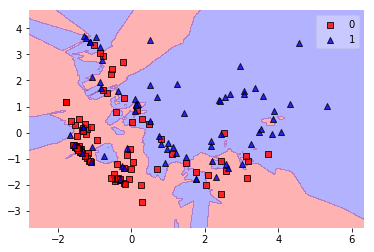

In [102]:
plot_decision_regions(X_test_pca[:,0:2], y_test.values,
                      knn_clf.fit(X_train_pca[:,0:2], y_train))

**This is the end of the exercise**

**Bonus**:   

In this bonus exercise we want to find the best value of k, i.e. the best number of nearest neighbors.

To find the best value for k we use a **GridSearch** with **cross validation**. In a GridSearch we compute for each combination of hyperparameters (here for each k) a performance score (here accuracy) by using cross validation. For K-Fold cross validation the dataset is split into K-Folds. Afterwards, the model is trained on K-1 splits and evaluated on an hold out set. This done K times, so that each Fold has been used as a hold out set. 

Please import the classes **GridSearchCV** and **Kfold** from the **modul sklearn.model_selection**. Create an object of the class KFold called cv. Pass the arguments random_state=42 and shuffle=True to the constructor. Afterwards, we create a python dictionary to use as a parameter grid. Hence, create a dictionary called param_grid holding only one Key-Value pair. As the key use the string 'n_neighbors' and as the value use a numpy array holding integer values from 1 to 20.

**Remark**: You can use the **get_params()** method on any machine learning objects to investigate all possible hyperparameters.

In [103]:
# Import GridSeach and KFold
from sklearn.model_selection import GridSearchCV, KFold

In [104]:
# Create KFold object (uses 3 splits as default)
cv = KFold(random_state=42, shuffle=True, n_splits=10)

In [105]:
# Check params using get_params()
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [106]:
# Create parameter grid (dictionary)
param_grid = {'n_neighbors': np.arange(1,21)}
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20])}

Next, we can create a gridsearch object called grid_clf of the class GridSearchCV. As arguments please use estimator=knn_clf, param_grid=param_grid, scoring='accuracy' and cv=cv.

In [107]:
# Create GridSearch object
#grid_clf = GridSearchCV(knn_clf, param_grid, scoring='accuracy', cv=cv)
grid_clf = GridSearchCV(knn_clf, param_grid, scoring='accuracy', cv=cv)

This object can be used like any ordinary classification object/model. Please train the model by passing the data X_train_scaled and y_train to the fit(X,y) method.

In [108]:
# Fit the gridsearch model
grid_clf.fit(X_train_pca[:,:2], y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

The fitted gridsearch estimator grid_clf has several attributes. For instance you can access the best estimator (best_estimator\_) or best parameters (best_params_).

In [109]:
# Access best params
grid_clf.best_params_

{'n_neighbors': 16}

Furthermore, this estimator has the attribute cv\_results\_ which gives you a summary dictionary of the gridsearch. You can pass it directly to the pd.DataFrame() method in order to create a dataframe out of it. Please do so and sort the dataframe by rank_test_score in ascending oder.

**Remark**: Ignore the warnings.

In [110]:
# Create cv results dataframe
cv_results = pd.DataFrame(grid_clf.cv_results_).sort_values(by='rank_test_score', ascending=True)
cv_results.head()

/home/jodahr/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jodahr/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jodahr/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jodahr/anaconda3/lib/python

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
16,0.000395,0.000551,0.786517,0.803995,17,{'n_neighbors': 17},1,0.833333,0.800000,0.736111,...,0.746479,0.809672,0.845070,0.794072,0.802817,0.800312,0.000014,0.000005,0.039551,0.004369
15,0.000391,0.000555,0.786517,0.799469,16,{'n_neighbors': 16},1,0.847222,0.790625,0.750000,...,0.746479,0.808112,0.830986,0.790952,0.802817,0.792512,0.000003,0.000024,0.039258,0.005951
13,0.000394,0.000535,0.785112,0.800094,14,{'n_neighbors': 14},3,0.847222,0.798438,0.736111,...,0.746479,0.804992,0.845070,0.795632,0.802817,0.795632,0.000011,0.000009,0.042656,0.004927
18,0.000399,0.000565,0.785112,0.802277,19,{'n_neighbors': 19},3,0.833333,0.795312,0.763889,...,0.746479,0.809672,0.859155,0.794072,0.760563,0.798752,0.000020,0.000014,0.040437,0.005241
17,0.000390,0.000563,0.783708,0.800717,18,{'n_neighbors': 18},5,0.833333,0.795312,0.736111,...,0.746479,0.808112,0.830986,0.792512,0.788732,0.801872,0.000005,0.000012,0.036689,0.004650


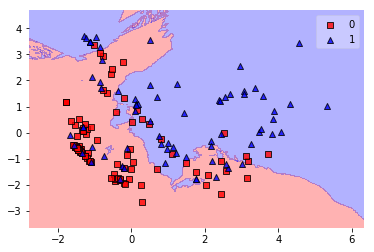

In [111]:
plot_decision_regions(X_test_pca[:,0:2], y_test.values, grid_clf.fit(X_train_pca[:,0:2], y_train))